In [118]:
import numpy as np
import pandas as pd
import os
pd.set_option("mode.chained_assignment",None)
from numpy import NaN,NAN,nan
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [119]:
adult_data = pd.read_csv("adult.csv", na_values = ' NaN', skipinitialspace = True) # read data and change missing values to default na

In [120]:
adult_data.columns = [ "age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_work","native_country","salary"]
adult_data.head()
# add columns

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_work,native_country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Take a Big Review 

In [121]:
adult_data.info()
# data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       30724 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      30717 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_work  32560 non-null  int64 
 13  native_country  31977 non-null  object
 14  salary          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [122]:
adult_data.describe()
# basic statistics

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_work
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education_num'}>,
        <AxesSubplot:title={'center':'capital_gain'}>],
       [<AxesSubplot:title={'center':'capital_loss'}>,
        <AxesSubplot:title={'center':'hours_per_work'}>]], dtype=object)

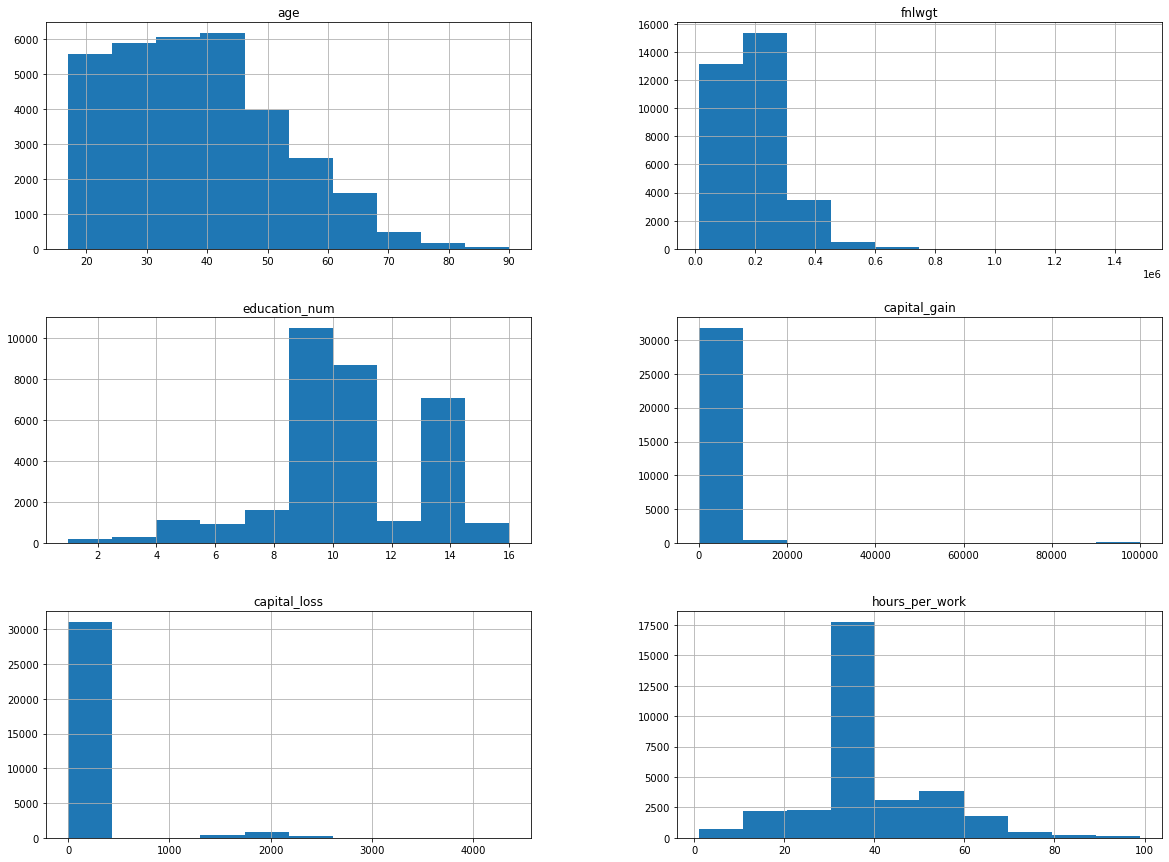

In [123]:
adult_data.hist(bins=10, figsize=(20,15))
#histograms for continuous variables

<AxesSubplot:>

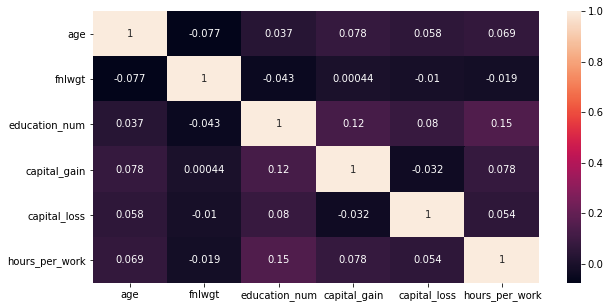

In [124]:
fig, ax = plt.subplots(figsize=(10,5))  
sns.heatmap(adult_data.corr(),annot=True)
# heatmap

# Gaussian Naive Bayes Classifier

In [125]:
# Define a function that count occurence of data of each column and calculate their probability in their own column
# For example,how many people is at the given age? Their probablities?
def count_occurence(varname, train_data):
    import collections
    var_dict = collections.Counter(list(train_data[varname]))
    items = list(var_dict.items())
    dataframe1 = pd.DataFrame(items)
    dataframe1.columns = [varname+"_distinct",varname+ "_count"]
    p_var = list(dataframe1[varname+"_count"]/len(train_data[varname]))
    dataframe1[varname+"_prob"] = p_var
    return dataframe1   

In [126]:
# Normal Distribution of a variable given salary>50K
# For continuous data
from scipy.stats import norm
#adult_NoNull
def normal_dis_abv50(var, train_data, test_data):
    p_var_given_abov50 = train_data.loc[(train_data['salary']== ">50K"),[var]]
    mean = np.mean(p_var_given_abov50[var])
    std = np.std(p_var_given_abov50[var])
    domain = np.linspace(np.min(p_var_given_abov50[var]),np.max(p_var_given_abov50[var]))
    normal_dis_abv50 = norm.pdf(test_data[var],mean,std)
    return  normal_dis_abv50

In [127]:
# Normal Distribution of a variable given salary<=50K
# For continuous data
def normal_dis_below50(var, train_data, test_data):
    p_age_given_below50 = train_data.loc[(train_data['salary']== "<=50K"),[var]]
    mean = np.mean(p_age_given_below50[var])
    std = np.std(p_age_given_below50[var])
    domain = np.linspace(np.min(p_age_given_below50[var]),np.max(p_age_given_below50[var]))
    normal_dis_below50 = norm.pdf(test_data[var],mean,std)
    return  normal_dis_below50

In [128]:
# Caculate the probability of given data by a given salary label
# For example, the probability of it is a male give his salary is >50K
# For categorical data
def p_var_given_salary(var,salary,train_data,test_data):
    salary_bool = train_data["salary"] == salary
    train_var = train_data[var][salary_bool]
    p_var_given_salary = test_data[var].apply(lambda x: np.mean(train_var == x))
    return p_var_given_salary

In [129]:
# Define a GaussianNB function that can make prediction of the given person's salary
def GaussianNB(train_data,test_data):
    salary_prob = count_occurence("salary",train_data)
    salary_prob.index = ["<=50K",">50K"]
    abov_50k = normal_dis_abv50("age",train_data,test_data)*\
               p_var_given_salary("workclass",">50K",train_data,test_data)*\
               normal_dis_abv50("fnlwgt",train_data,test_data)*\
               p_var_given_salary("education",">50K",train_data,test_data)*\
               normal_dis_abv50("education_num",train_data,test_data)*\
               p_var_given_salary("marital_status",">50K",train_data,test_data)*\
               p_var_given_salary("occupation",">50K",train_data,test_data)*\
               p_var_given_salary("relationship",">50K",train_data,test_data)*\
               p_var_given_salary("race",">50K",train_data,test_data)*\
               p_var_given_salary("sex",">50K",train_data,test_data) *\
               normal_dis_abv50("capital_gain",train_data,test_data)*\
               normal_dis_abv50("capital_loss",train_data,test_data)*\
               normal_dis_abv50("hours_per_work",train_data,test_data)*\
               p_var_given_salary("native_country",">50K",train_data,test_data)*\
               salary_prob.loc[">50K","salary_prob"] 
    below_50k = normal_dis_below50("age",train_data,test_data)*\
                p_var_given_salary("workclass","<=50K",train_data,test_data)*\
                normal_dis_below50("fnlwgt",train_data,test_data)*\
                p_var_given_salary("education","<=50K",train_data,test_data)*\
                normal_dis_below50("education_num",train_data,test_data)*\
                p_var_given_salary("marital_status","<=50K",train_data,test_data)*\
                p_var_given_salary("occupation","<=50K",train_data,test_data)*\
                p_var_given_salary("relationship","<=50K",train_data,test_data)*\
                p_var_given_salary("race","<=50K",train_data,test_data)*\
                p_var_given_salary("sex","<=50K",train_data,test_data)*\
                normal_dis_below50("capital_gain",train_data,test_data)*\
                normal_dis_below50("capital_loss",train_data,test_data)*\
                normal_dis_below50("hours_per_work",train_data,test_data)*\
                p_var_given_salary("native_country","<=50K",train_data,test_data)*\
                salary_prob.loc["<=50K","salary_prob"] 
#     if abov_50k>below_50k:
#         salary_predict = ">50K"
#     else:
#         salary_predict = "<=50K"
#    return salary_predict
    return np.where(abov_50k > below_50k, ">50K", "<=50K")

### Combination 1: Drop Missing Values & Gaussian Naive Bayes

In [130]:
# to count missing values for each column
def count_missing(number):
    null_number = pd.isnull(number)
    null_count = np.sum(null_number)
    return null_count

In [131]:
cmis_column1 = adult_data.apply(count_missing)
cmis_column1

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_work       0
native_country     583
salary               0
dtype: int64

In [132]:
# Create a new dataset without mssing values
adult_NoNull_GNB = adult_data.dropna() 

In [133]:
# SLOW TO RUN!! Average time: 12 minutes
# create a set of randomized index
np.random.seed(seed = 2021)
rand_index = np.arange(adult_NoNull_GNB.shape[0])
np.random.shuffle(rand_index)
adult_NoNull_GNB_rand = adult_NoNull_GNB.iloc[rand_index]

# split the randomized data into 10 folds
num_folds = 10
folds = np.array_split(adult_NoNull_GNB_rand, num_folds)
true_labels_c1 = []
pred_labels_c1 = []
for i in range(num_folds):
    train_index = np.arange(num_folds).tolist()
    del train_index[i]
    train_data = pd.concat([folds[j] for j in train_index], axis = 0)
    test_data = folds[i]
    test_data.reset_index(drop = True, inplace = True)

    # predict the test data
    pred_labels_c1.append(GaussianNB(train_data,test_data))
    true_labels_c1.append(test_data.salary)

In [134]:
def get_score(true_label, predict_label):
    pos_label = ">50K"
    TP = np.sum(predict_label[true_label == pos_label] == pos_label)
    TN = np.sum(predict_label[true_label != pos_label] != pos_label)
    FP = np.sum(predict_label[true_label != pos_label] == pos_label)
    FN = np.sum(predict_label[true_label == pos_label] != pos_label)
    recall = TP/(TP+FN)
    precision = TP/(TP+FP)
    f1_score = 2*((precision*recall)/(precision+recall))
    accuracy = np.mean(true_label == predict_label)
    return [accuracy, recall, precision, f1_score]

In [135]:
score_table_c1 = {}
score_table_c1['subset'] = []
score_table_c1['accuracy'] = []
score_table_c1['recall'] = []
score_table_c1['precision'] = []
score_table_c1['f1_score'] = []

for i in range(10):
    fold_score_c1 = get_score(true_labels_c1[i], pred_labels_c1[i])
    score_table_c1['subset'].append('fold'+str(i+1))
    score_table_c1['accuracy'].append(fold_score_c1[0])
    score_table_c1['recall'].append(fold_score_c1[1])
    score_table_c1['precision'].append(fold_score_c1[2])
    score_table_c1['f1_score'].append(fold_score_c1[3])

In [136]:
full_score_c1 = get_score(np.hstack(true_labels_c1), np.hstack(pred_labels_c1))
score_table_c1['subset'].append("full_data")
score_table_c1['accuracy'].append(full_score_c1[0])
score_table_c1['recall'].append(full_score_c1[1])
score_table_c1['precision'].append(full_score_c1[2])
score_table_c1['f1_score'].append(full_score_c1[3])

In [137]:
pd.DataFrame(score_table_c1)

,subset,accuracy,recall,precision,f1_score
0,fold1,0.829964,0.526316,0.723327,0.609292
1,fold2,0.822613,0.681698,0.635352,0.657710
2,fold3,0.837202,0.724274,0.660650,0.691001
3,fold4,0.819629,0.671504,0.633085,0.651729
4,fold5,0.820292,0.685915,0.604218,0.642480
5,fold6,0.838196,0.722142,0.627673,0.671602
6,fold7,0.823276,0.697523,0.639952,0.667498
7,fold8,0.821618,0.675532,0.633416,0.653797
8,fold9,0.823607,0.696139,0.659976,0.677576
9,fold10,0.824602,0.664901,0.645244,0.654925


### Combination 2: Drop Missing Values & Discretization

In [138]:
adult_NoNull_Disc = adult_NoNull_GNB
adult_NoNull_Disc

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_work,native_country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [139]:
def cont_to_cat(varname, m):    # function that can apply all continuous variables to perform equal-bins width method
    n = math.ceil((adult_NoNull_Disc[varname].max()-adult_NoNull_Disc[varname].min())/m)    #  get range for each variable
    hist_obj = plt.hist(adult_NoNull_Disc[varname], bins = n)   
    plt.show()
    bins_boundary = list(hist_obj[1]) # list of range for each bin
    group_labels =  [varname+str(x+1) for x in range(len(bins_boundary)-1)]  # sort groups
    adult_NoNull_Disc[varname+'_cat'] = pd.cut(adult_NoNull_Disc[varname],bins_boundary,labels = group_labels, include_lowest = True) 
    adult_NoNull_Disc[varname+'_cat'].sort_values().hist()
    plt.show()
    print(bins_boundary)

##### age

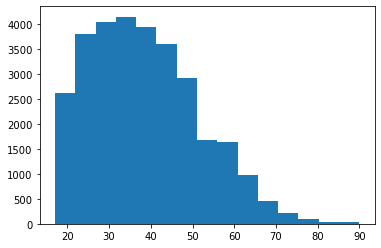

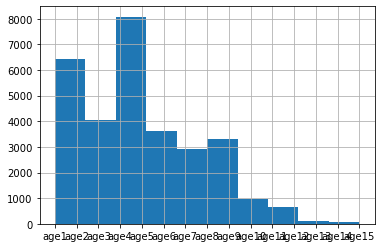

[17.0, 21.866666666666667, 26.733333333333334, 31.599999999999998, 36.46666666666667, 41.33333333333333, 46.199999999999996, 51.06666666666666, 55.93333333333333, 60.8, 65.66666666666666, 70.53333333333333, 75.39999999999999, 80.26666666666665, 85.13333333333333, 90.0]


In [140]:
cont_to_cat("age",5)

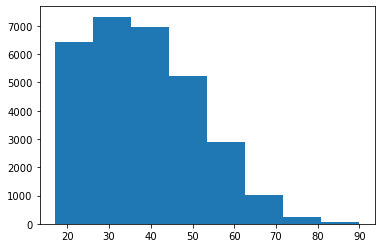

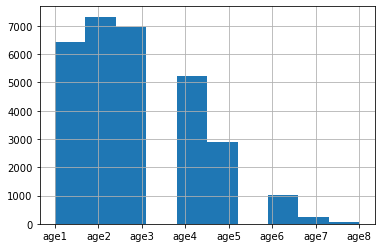

[17.0, 26.125, 35.25, 44.375, 53.5, 62.625, 71.75, 80.875, 90.0]


In [141]:
cont_to_cat("age",10)

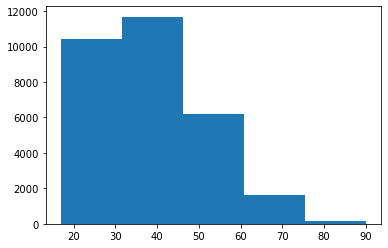

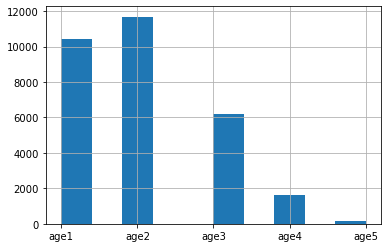

[17.0, 31.6, 46.2, 60.8, 75.4, 90.0]


In [142]:
cont_to_cat("age",15)   # used Tableau to get this bin width

In [143]:
adult_NoNull_Disc['age_cat'] = adult_NoNull_Disc.age_cat.cat.codes   # change the category data type to object type
adult_NoNull_Disc

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_work,native_country,salary,age_cat
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,2
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,2
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,2
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


##### fnlwgt

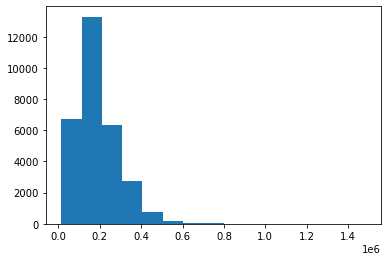

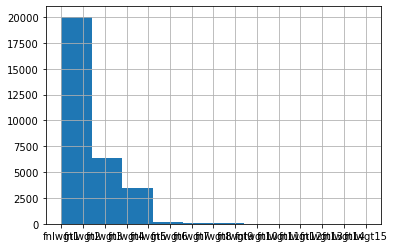

[13769.0, 111831.4, 209893.8, 307956.19999999995, 406018.6, 504081.0, 602143.3999999999, 700205.7999999999, 798268.2, 896330.6, 994393.0, 1092455.4, 1190517.7999999998, 1288580.2, 1386642.5999999999, 1484705.0]


In [144]:
cont_to_cat("fnlwgt",100000)

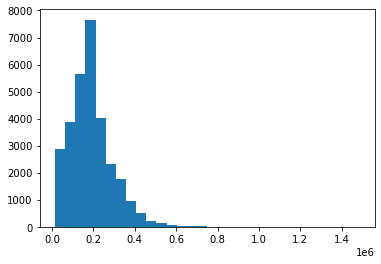

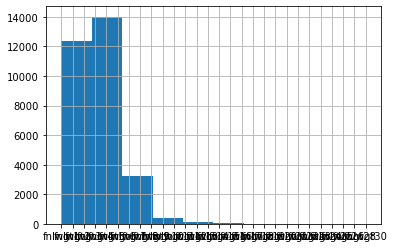

[13769.0, 62800.2, 111831.4, 160862.59999999998, 209893.8, 258925.0, 307956.19999999995, 356987.39999999997, 406018.6, 455049.8, 504081.0, 553112.2, 602143.3999999999, 651174.6, 700205.7999999999, 749237.0, 798268.2, 847299.3999999999, 896330.6, 945361.7999999999, 994393.0, 1043424.2, 1092455.4, 1141486.5999999999, 1190517.7999999998, 1239549.0, 1288580.2, 1337611.4, 1386642.5999999999, 1435673.7999999998, 1484705.0]


In [145]:
cont_to_cat("fnlwgt",50000)

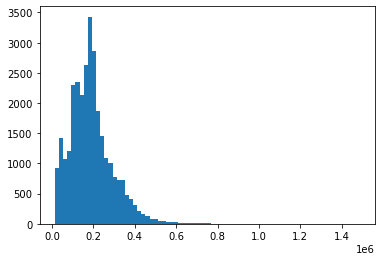

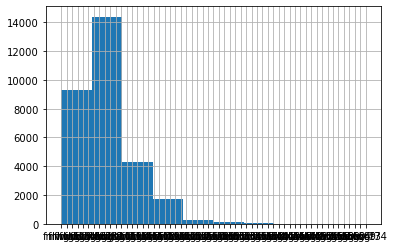

[13769.0, 33646.51351351351, 53524.02702702703, 73401.54054054053, 93279.05405405405, 113156.56756756757, 133034.08108108107, 152911.5945945946, 172789.1081081081, 192666.62162162163, 212544.13513513515, 232421.64864864864, 252299.16216216216, 272176.6756756757, 292054.1891891892, 311931.7027027027, 331809.2162162162, 351686.7297297297, 371564.24324324325, 391441.75675675675, 411319.2702702703, 431196.7837837838, 451074.2972972973, 470951.8108108108, 490829.3243243243, 510706.8378378378, 530584.3513513514, 550461.8648648649, 570339.3783783783, 590216.8918918918, 610094.4054054054, 629971.9189189189, 649849.4324324324, 669726.9459459459, 689604.4594594594, 709481.972972973, 729359.4864864865, 749237.0, 769114.5135135135, 788992.027027027, 808869.5405405406, 828747.0540540541, 848624.5675675676, 868502.0810810811, 888379.5945945946, 908257.108108108, 928134.6216216217, 948012.1351351351, 967889.6486486486, 987767.1621621621, 1007644.6756756756, 1027522.1891891892, 1047399.7027027027, 106

In [146]:
cont_to_cat("fnlwgt",20000)

In [147]:
adult_NoNull_Disc['fnlwgt_cat'] = adult_NoNull_Disc.fnlwgt_cat.cat.codes
adult_NoNull_Disc

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_work,native_country,salary,age_cat,fnlwgt_cat
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,2,3
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,10
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,2,11
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,16
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,12
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1,7
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,2,6
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,9


##### education-num

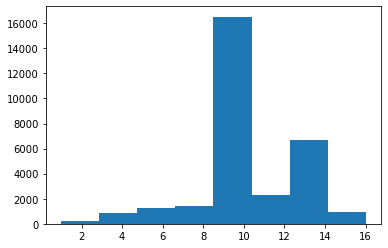

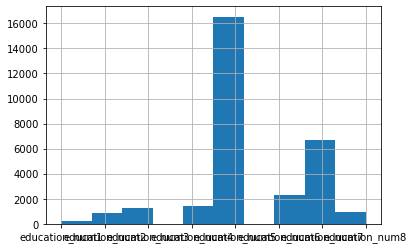

[1.0, 2.875, 4.75, 6.625, 8.5, 10.375, 12.25, 14.125, 16.0]


In [148]:
cont_to_cat("education_num",2)

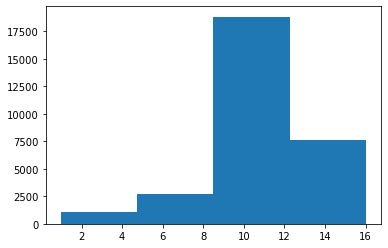

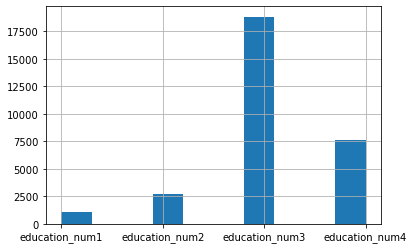

[1.0, 4.75, 8.5, 12.25, 16.0]


In [149]:
cont_to_cat("education_num",4)

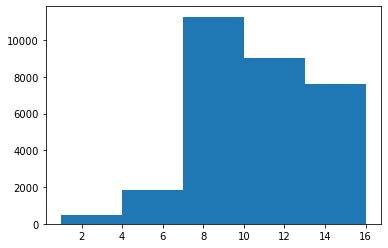

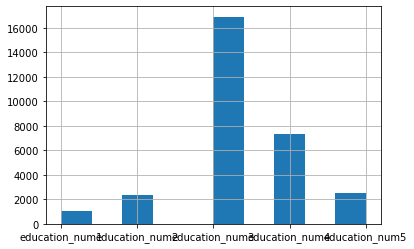

[1.0, 4.0, 7.0, 10.0, 13.0, 16.0]


In [150]:
cont_to_cat("education_num",3)

In [151]:
adult_NoNull_Disc['education_num_cat'] = adult_NoNull_Disc.education_num_cat.cat.codes
adult_NoNull_Disc

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_work,native_country,salary,age_cat,fnlwgt_cat,education_num_cat
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,2,3,3
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,10,2
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,2,11,1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,16,3
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,1,13,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,12,3
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1,7,2
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,2,6,2
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,9,2


##### capital-gain

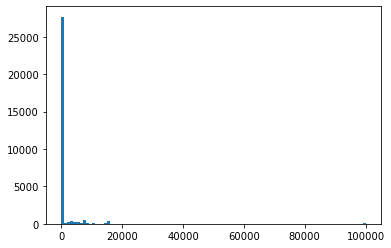

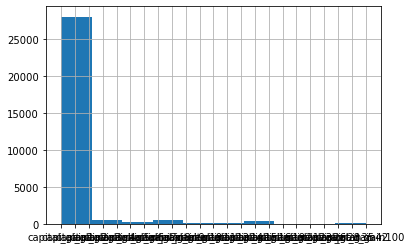

[0.0, 999.99, 1999.98, 2999.9700000000003, 3999.96, 4999.95, 5999.9400000000005, 6999.93, 7999.92, 8999.91, 9999.9, 10999.89, 11999.880000000001, 12999.87, 13999.86, 14999.85, 15999.84, 16999.83, 17999.82, 18999.81, 19999.8, 20999.79, 21999.78, 22999.77, 23999.760000000002, 24999.75, 25999.74, 26999.73, 27999.72, 28999.71, 29999.7, 30999.69, 31999.68, 32999.67, 33999.66, 34999.65, 35999.64, 36999.63, 37999.62, 38999.61, 39999.6, 40999.590000000004, 41999.58, 42999.57, 43999.56, 44999.55, 45999.54, 46999.53, 47999.520000000004, 48999.51, 49999.5, 50999.49, 51999.48, 52999.47, 53999.46, 54999.45, 55999.44, 56999.43, 57999.42, 58999.41, 59999.4, 60999.39, 61999.38, 62999.37, 63999.36, 64999.35, 65999.34, 66999.33, 67999.32, 68999.31, 69999.3, 70999.29, 71999.28, 72999.27, 73999.26, 74999.25, 75999.24, 76999.23, 77999.22, 78999.21, 79999.2, 80999.19, 81999.18000000001, 82999.17, 83999.16, 84999.15, 85999.14, 86999.13, 87999.12, 88999.11, 89999.1, 90999.09, 91999.08, 92999.07, 93999.06, 949

In [152]:
cont_to_cat("capital_gain",1000)

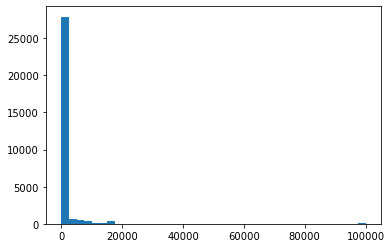

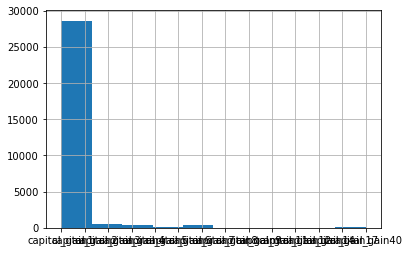

[0.0, 2499.975, 4999.95, 7499.924999999999, 9999.9, 12499.875, 14999.849999999999, 17499.825, 19999.8, 22499.774999999998, 24999.75, 27499.725, 29999.699999999997, 32499.675, 34999.65, 37499.625, 39999.6, 42499.575, 44999.549999999996, 47499.525, 49999.5, 52499.475, 54999.45, 57499.424999999996, 59999.399999999994, 62499.375, 64999.35, 67499.325, 69999.3, 72499.275, 74999.25, 77499.22499999999, 79999.2, 82499.175, 84999.15, 87499.125, 89999.09999999999, 92499.075, 94999.05, 97499.025, 99999.0]


In [153]:
cont_to_cat("capital_gain",2500)

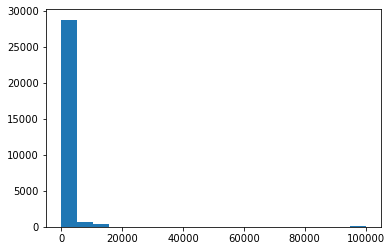

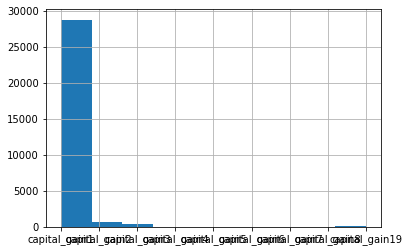

[0.0, 5263.105263157895, 10526.21052631579, 15789.315789473685, 21052.42105263158, 26315.526315789473, 31578.63157894737, 36841.73684210527, 42104.84210526316, 47367.94736842105, 52631.05263157895, 57894.15789473685, 63157.26315789474, 68420.36842105264, 73683.47368421053, 78946.57894736843, 84209.68421052632, 89472.78947368421, 94735.8947368421, 99999.0]


In [154]:
cont_to_cat("capital_gain",5500)

In [155]:
adult_NoNull_Disc['capital_gain_cat'] = adult_NoNull_Disc.capital_gain_cat.cat.codes
adult_NoNull_Disc

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_work,native_country,salary,age_cat,fnlwgt_cat,education_num_cat,capital_gain_cat
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,2,3,3,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,10,2,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,2,11,1,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,16,3,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,1,13,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,12,3,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1,7,2,0
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,2,6,2,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,9,2,0


##### capital-loss

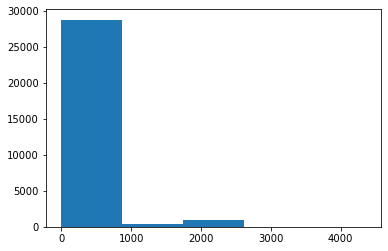

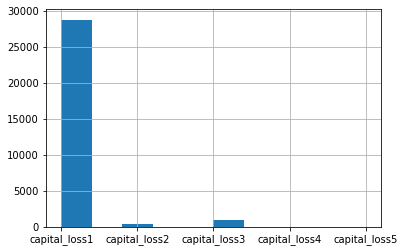

[0.0, 871.2, 1742.4, 2613.6000000000004, 3484.8, 4356.0]


In [156]:
cont_to_cat("capital_loss",1000)

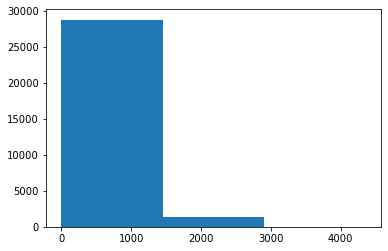

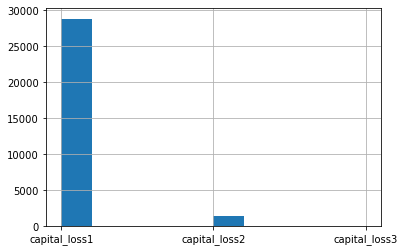

[0.0, 1452.0, 2904.0, 4356.0]


In [157]:
cont_to_cat("capital_loss",2000)

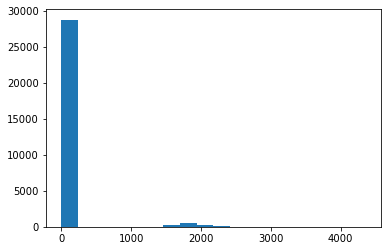

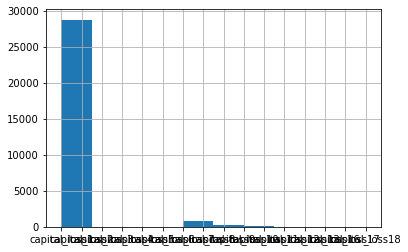

[0.0, 242.0, 484.0, 726.0, 968.0, 1210.0, 1452.0, 1694.0, 1936.0, 2178.0, 2420.0, 2662.0, 2904.0, 3146.0, 3388.0, 3630.0, 3872.0, 4114.0, 4356.0]


In [158]:
cont_to_cat("capital_loss",250)

In [159]:
adult_NoNull_Disc['capital_loss_cat'] = adult_NoNull_Disc.capital_loss_cat.cat.codes
adult_NoNull_Disc

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_work,native_country,salary,age_cat,fnlwgt_cat,education_num_cat,capital_gain_cat,capital_loss_cat
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,2,3,3,0,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,10,2,0,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,2,11,1,0,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,16,3,0,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,1,13,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,12,3,0,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1,7,2,0,0
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,2,6,2,0,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,9,2,0,0


##### hours-per-work

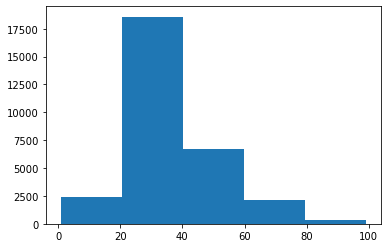

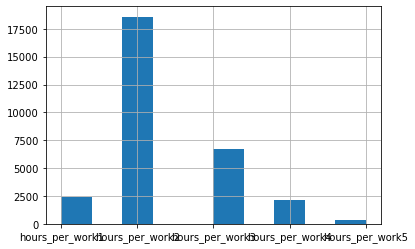

[1.0, 20.6, 40.2, 59.800000000000004, 79.4, 99.0]


In [160]:
cont_to_cat("hours_per_work",20)

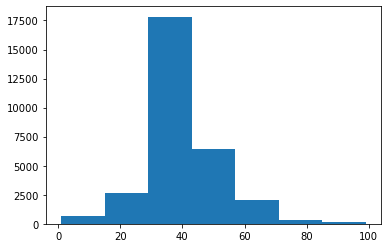

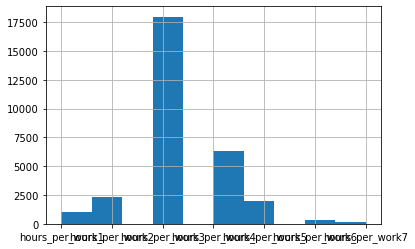

[1.0, 15.0, 29.0, 43.0, 57.0, 71.0, 85.0, 99.0]


In [161]:
cont_to_cat("hours_per_work",15)

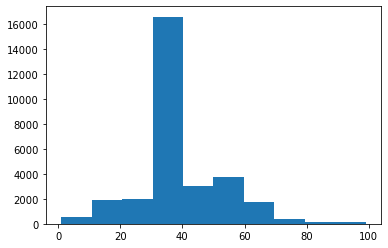

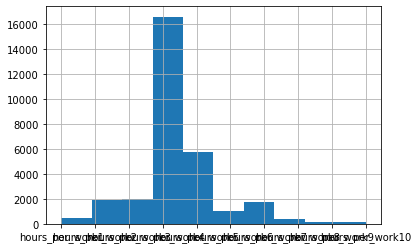

[1.0, 10.8, 20.6, 30.400000000000002, 40.2, 50.0, 59.800000000000004, 69.60000000000001, 79.4, 89.2, 99.0]


In [162]:
cont_to_cat("hours_per_work",10)

In [163]:
adult_NoNull_Disc['hours_per_work_cat'] = adult_NoNull_Disc.hours_per_work_cat.cat.codes
adult_NoNull_Disc

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,capital_loss,hours_per_work,native_country,salary,age_cat,fnlwgt_cat,education_num_cat,capital_gain_cat,capital_loss_cat,hours_per_work_cat
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,13,United-States,<=50K,2,3,3,0,0,1
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,40,United-States,<=50K,1,10,2,0,0,3
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,40,United-States,<=50K,2,11,1,0,0,3
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,40,Cuba,<=50K,0,16,3,0,0,3
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,0,40,United-States,<=50K,1,13,4,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,...,0,38,United-States,<=50K,0,12,3,0,0,3
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,0,40,United-States,>50K,1,7,2,0,0,3
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,...,0,40,United-States,<=50K,2,6,2,0,0,3
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,...,0,20,United-States,<=50K,0,9,2,0,0,1


In [164]:
# Define a GaussianNB function that can make prediction of the given person's salary
def GaussianNB_disc(train_data,test_data):
    salary_prob = count_occurence("salary",train_data)
    salary_prob.index = ["<=50K",">50K"]
    abov_50k = p_var_given_salary("age_cat",">50K",train_data,test_data)*\
               p_var_given_salary("workclass",">50K",train_data,test_data)*\
               p_var_given_salary("fnlwgt_cat",">50K",train_data,test_data) *\
               p_var_given_salary("education",">50K",train_data,test_data)*\
               p_var_given_salary("education_num_cat",">50K",train_data,test_data) *\
               p_var_given_salary("marital_status",">50K",train_data,test_data)*\
               p_var_given_salary("occupation",">50K",train_data,test_data)*\
               p_var_given_salary("relationship",">50K",train_data,test_data)*\
               p_var_given_salary("race",">50K",train_data,test_data)*\
               p_var_given_salary("sex",">50K",train_data,test_data) *\
               p_var_given_salary("capital_gain_cat",">50K",train_data,test_data) *\
               p_var_given_salary("capital_loss_cat",">50K",train_data,test_data)*\
               p_var_given_salary("hours_per_work_cat",">50K",train_data,test_data)*\
               p_var_given_salary("native_country",">50K",train_data,test_data)*\
               salary_prob.loc[">50K","salary_prob"] 
    below_50k = p_var_given_salary("age_cat","<=50K",train_data,test_data)*\
                p_var_given_salary("workclass","<=50K",train_data,test_data)*\
                p_var_given_salary("fnlwgt_cat","<=50K",train_data,test_data) *\
                p_var_given_salary("education","<=50K",train_data,test_data)*\
                p_var_given_salary("education_num_cat","<=50K",train_data,test_data) *\
                p_var_given_salary("marital_status","<=50K",train_data,test_data)*\
                p_var_given_salary("occupation","<=50K",train_data,test_data)*\
                p_var_given_salary("relationship","<=50K",train_data,test_data)*\
                p_var_given_salary("race","<=50K",train_data,test_data)*\
                p_var_given_salary("sex","<=50K",train_data,test_data)*\
                p_var_given_salary("capital_gain_cat","<=50K",train_data,test_data)*\
                p_var_given_salary("capital_loss_cat","<=50K",train_data,test_data)*\
                p_var_given_salary("hours_per_work_cat","<=50K",train_data,test_data)*\
                p_var_given_salary("native_country","<=50K",train_data,test_data)*\
                salary_prob.loc["<=50K","salary_prob"] 
#     if abov_50k>below_50k:
#         salary_predict = ">50K"
#     else:
#         salary_predict = "<=50K"
#    return salary_predict
    return np.where(abov_50k > below_50k, ">50K", "<=50K")

In [165]:
# SLOW TO RUN!! Average time: 15 minutes
# create a set of randomized index
np.random.seed(seed = 2021)
rand_index = np.arange(adult_NoNull_Disc.shape[0])
np.random.shuffle(rand_index)
adult_NoNull_Disc_rand = adult_NoNull_Disc.iloc[rand_index]

# split the randomized data into 10 folds
num_folds = 10
folds = np.array_split(adult_NoNull_Disc_rand, num_folds)
true_labels_c2 = []
pred_labels_c2 = []
for i in range(num_folds):
    train_index = np.arange(num_folds).tolist()
    del train_index[i]
    train_data = pd.concat([folds[j] for j in train_index], axis = 0)
    test_data = folds[i]
    test_data.reset_index(drop = True, inplace = True)

    # predict the test data
    pred_labels_c2.append(GaussianNB_disc(train_data,test_data))
    true_labels_c2.append(test_data.salary)

In [166]:
folds_scores_c2 = [get_score(true_labels_c2[i], pred_labels_c2[i]) for i in range(len(true_labels_c2))]

score_table_c2 = {}
score_table_c2['subset'] = []
score_table_c2['accuracy'] = []
score_table_c2['recall'] = []
score_table_c2['precision'] = []
score_table_c2['f1_score'] = []

for i in range(10):
    fold_score_c2 = get_score(true_labels_c2[i], pred_labels_c2[i])
    score_table_c2['subset'].append('fold'+str(i+1))
    score_table_c2['accuracy'].append(fold_score_c2[0])
    score_table_c2['recall'].append(fold_score_c2[1])
    score_table_c2['precision'].append(fold_score_c2[2])
    score_table_c2['f1_score'].append(fold_score_c2[3])

full_score_c2 = get_score(np.hstack(true_labels_c2), np.hstack(pred_labels_c2))
score_table_c2['subset'].append("full_data")
score_table_c2['accuracy'].append(full_score_c2[0])
score_table_c2['recall'].append(full_score_c2[1])
score_table_c2['precision'].append(full_score_c2[2])
score_table_c2['f1_score'].append(full_score_c2[3])

pd.DataFrame(score_table_c2)

,subset,accuracy,recall,precision,f1_score
0,fold1,0.827643,0.792105,0.624481,0.698376
1,fold2,0.759947,0.931034,0.510917,0.659774
2,fold3,0.755968,0.903694,0.508160,0.650522
3,fold4,0.742374,0.920844,0.493286,0.642430
4,fold5,0.749005,0.918310,0.482605,0.632703
5,fold6,0.752653,0.924747,0.479370,0.631423
6,fold7,0.741048,0.904824,0.495007,0.639926
7,fold8,0.746021,0.921543,0.495000,0.644052
8,fold9,0.758289,0.924035,0.526241,0.670583
9,fold10,0.748011,0.915232,0.498198,0.645191


### combination 3: Assign Missing Values to New Values & Gaussian Naive Bayes

In [167]:
# Find which columns contain missing values
# Count how many missing values do they contain
adult_data.apply(count_missing)

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_work       0
native_country     583
salary               0
dtype: int64

In [168]:
adult_WthNull_GNB = adult_data

In [169]:
# Find the most frequent data in each column in Tableau
# Fill the missing values with them
adult_WthNull_GNB["workclass"].fillna("Private",inplace= True)
adult_WthNull_GNB["occupation"].fillna("Other-service",inplace=True)
adult_WthNull_GNB["native_country"].fillna("United-States",inplace=True)

In [170]:
# Make sure missing values are cleared
adult_WthNull_GNB.apply(count_missing)

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_work    0
native_country    0
salary            0
dtype: int64

In [171]:
# SLOW TO RUN!! Average time: 12 minutes
# create a set of randomized index
np.random.seed(seed = 2021)
rand_index = np.arange(adult_NoNull_GNB.shape[0])
np.random.shuffle(rand_index)
adult_NoNull_GNB_rand = adult_NoNull_GNB.iloc[rand_index]

# split the randomized data into 10 folds
num_folds = 10
folds = np.array_split(adult_NoNull_GNB_rand, num_folds)
true_labels_c3 = []
pred_labels_c3 = []
for i in range(num_folds):
    train_index = np.arange(num_folds).tolist()
    del train_index[i]
    train_data = pd.concat([folds[j] for j in train_index], axis = 0)
    test_data = folds[i]
    test_data.reset_index(drop = True, inplace = True)

    # predict the test data
    pred_labels_c3.append(GaussianNB(train_data,test_data)) # Use GaussianNB()
    true_labels_c3.append(test_data.salary)

In [172]:
score_table_c3 = {}
score_table_c3['subset'] = []
score_table_c3['accuracy'] = []
score_table_c3['recall'] = []
score_table_c3['precision'] = []
score_table_c3['f1_score'] = []

In [173]:
for i in range(10):
    fold_score_c3 = get_score(true_labels_c3[i], pred_labels_c3[i])
    score_table_c3['subset'].append('fold'+str(i+1))
    score_table_c3['accuracy'].append(fold_score_c3[0])
    score_table_c3['recall'].append(fold_score_c3[1])
    score_table_c3['precision'].append(fold_score_c3[2])
    score_table_c3['f1_score'].append(fold_score_c3[3])

In [174]:
full_score_c3 = get_score(np.hstack(true_labels_c3), np.hstack(pred_labels_c3))
score_table_c3['subset'].append("full_data")
score_table_c3['accuracy'].append(full_score_c3[0])
score_table_c3['recall'].append(full_score_c3[1])
score_table_c3['precision'].append(full_score_c3[2])
score_table_c3['f1_score'].append(full_score_c3[3])

pd.DataFrame(score_table_c3)

,subset,accuracy,recall,precision,f1_score
0,fold1,0.829964,0.526316,0.723327,0.609292
1,fold2,0.822613,0.681698,0.635352,0.657710
2,fold3,0.837202,0.724274,0.660650,0.691001
3,fold4,0.819629,0.671504,0.633085,0.651729
4,fold5,0.820292,0.685915,0.604218,0.642480
5,fold6,0.838196,0.722142,0.627673,0.671602
6,fold7,0.823276,0.697523,0.639952,0.667498
7,fold8,0.821618,0.675532,0.633416,0.653797
8,fold9,0.823607,0.696139,0.659976,0.677576
9,fold10,0.824602,0.664901,0.645244,0.654925


### combination 4: Assign Missing Values to New Values & Discretization

In [175]:
adult_WthNull_Disc=adult_WthNull_GNB

In [176]:
def cont_to_cat2(varname, m):    # updated con_to_cat function that used for combination 3, changed to adult_WthNull_Disc dataset
    n = math.ceil((adult_WthNull_Disc[varname].max()-adult_WthNull_Disc[varname].min())/m)    #  get range for each variable
    hist_obj = plt.hist(adult_WthNull_Disc[varname], bins = n)   
    plt.show()
    bins_boundary = list(hist_obj[1]) # list of range for each bin
    group_labels =  [varname+str(x+1) for x in range(len(bins_boundary)-1)]  # sort groups
    adult_WthNull_Disc[varname+'_cat'] = pd.cut(adult_WthNull_Disc[varname],bins_boundary,labels = group_labels, include_lowest = True) 
    adult_WthNull_Disc[varname+'_cat'].sort_values().hist()
    plt.show()
    print(bins_boundary)

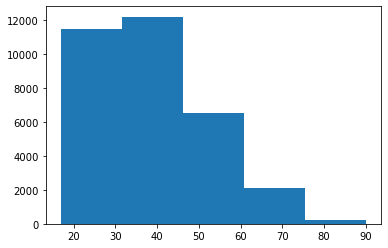

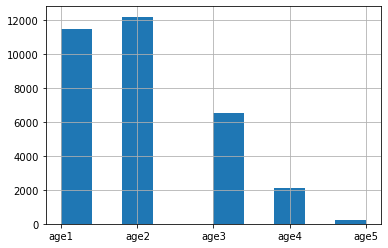

[17.0, 31.6, 46.2, 60.8, 75.4, 90.0]


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_work,native_country,salary,age_cat
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,2
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,2
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,2
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


In [177]:
cont_to_cat2("age",15)   
adult_WthNull_Disc['age_cat'] = adult_WthNull_Disc.age_cat.cat.codes
adult_WthNull_Disc

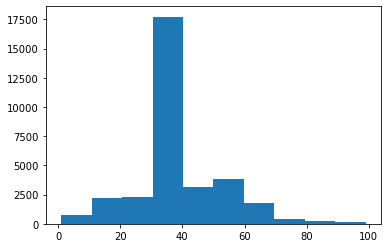

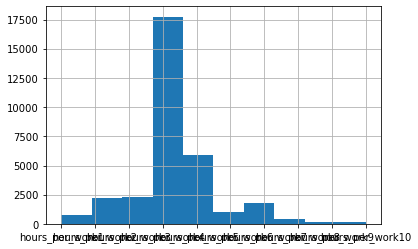

[1.0, 10.8, 20.6, 30.400000000000002, 40.2, 50.0, 59.800000000000004, 69.60000000000001, 79.4, 89.2, 99.0]


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_work,native_country,salary,age_cat,hours_per_work_cat
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,2,1
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,3
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,2,3
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,3
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,3
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1,3
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,2,3
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,1


In [178]:
cont_to_cat2("hours_per_work",10)
adult_WthNull_Disc['hours_per_work_cat'] = adult_WthNull_Disc.hours_per_work_cat.cat.codes
adult_WthNull_Disc

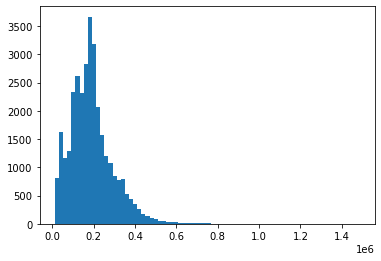

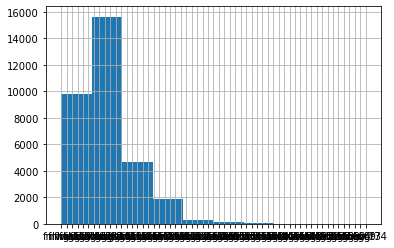

[12285.0, 32182.567567567567, 52080.13513513513, 71977.70270270269, 91875.27027027027, 111772.83783783784, 131670.40540540538, 151567.97297297296, 171465.54054054053, 191363.1081081081, 211260.67567567568, 231158.24324324323, 251055.8108108108, 270953.37837837834, 290850.9459459459, 310748.5135135135, 330646.08108108107, 350543.64864864864, 370441.2162162162, 390338.7837837838, 410236.35135135136, 430133.9189189189, 450031.48648648645, 469929.054054054, 489826.6216216216, 509724.1891891892, 529621.7567567567, 549519.3243243243, 569416.8918918918, 589314.4594594594, 609212.027027027, 629109.5945945946, 649007.1621621621, 668904.7297297297, 688802.2972972973, 708699.8648648649, 728597.4324324324, 748495.0, 768392.5675675676, 788290.1351351351, 808187.7027027027, 828085.2702702702, 847982.8378378378, 867880.4054054053, 887777.9729729729, 907675.5405405405, 927573.108108108, 947470.6756756756, 967368.2432432432, 987265.8108108108, 1007163.3783783783, 1027060.9459459459, 1046958.5135135135,

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_work,native_country,salary,age_cat,hours_per_work_cat,fnlwgt_cat
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,2,1,3
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,3,10
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,2,3,11
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,3,16
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,1,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,3,12
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1,3,7
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,2,3,7
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,1,9


In [179]:
cont_to_cat2("fnlwgt",20000)
adult_WthNull_Disc['fnlwgt_cat'] = adult_WthNull_Disc.fnlwgt_cat.cat.codes
adult_WthNull_Disc

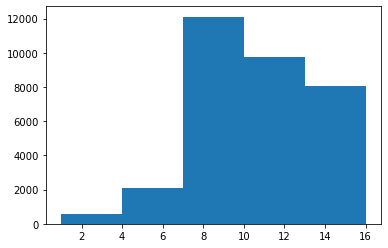

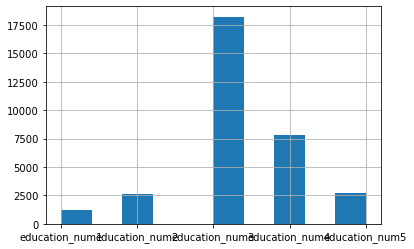

[1.0, 4.0, 7.0, 10.0, 13.0, 16.0]


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_work,native_country,salary,age_cat,hours_per_work_cat,fnlwgt_cat,education_num_cat
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,2,1,3,3
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,3,10,2
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,2,3,11,1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,3,16,3
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,1,3,13,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,3,12,3
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1,3,7,2
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,2,3,7,2
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,1,9,2


In [180]:
cont_to_cat2("education_num",3)
adult_WthNull_Disc['education_num_cat'] = adult_WthNull_Disc.education_num_cat.cat.codes
adult_WthNull_Disc

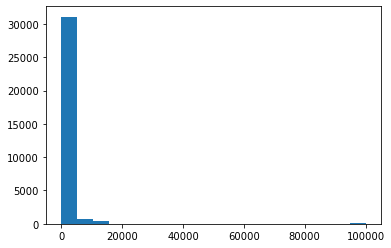

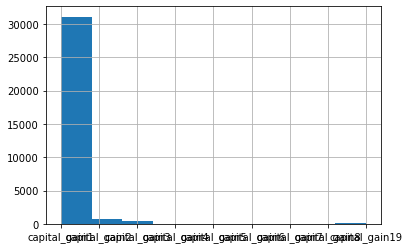

[0.0, 5263.105263157895, 10526.21052631579, 15789.315789473685, 21052.42105263158, 26315.526315789473, 31578.63157894737, 36841.73684210527, 42104.84210526316, 47367.94736842105, 52631.05263157895, 57894.15789473685, 63157.26315789474, 68420.36842105264, 73683.47368421053, 78946.57894736843, 84209.68421052632, 89472.78947368421, 94735.8947368421, 99999.0]


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_work,native_country,salary,age_cat,hours_per_work_cat,fnlwgt_cat,education_num_cat,capital_gain_cat
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,2,1,3,3,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,3,10,2,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,2,3,11,1,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,3,16,3,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,1,3,13,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,3,12,3,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1,3,7,2,0
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,2,3,7,2,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,1,9,2,0


In [181]:
cont_to_cat2("capital_gain",5500)
adult_WthNull_Disc['capital_gain_cat'] = adult_WthNull_Disc.capital_gain_cat.cat.codes
adult_WthNull_Disc

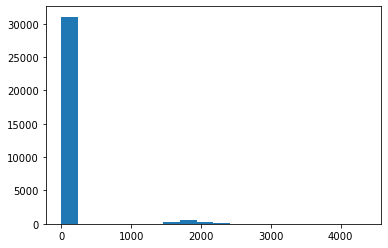

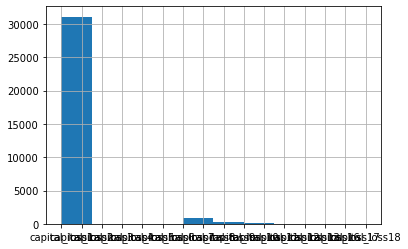

[0.0, 242.0, 484.0, 726.0, 968.0, 1210.0, 1452.0, 1694.0, 1936.0, 2178.0, 2420.0, 2662.0, 2904.0, 3146.0, 3388.0, 3630.0, 3872.0, 4114.0, 4356.0]


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,capital_loss,hours_per_work,native_country,salary,age_cat,hours_per_work_cat,fnlwgt_cat,education_num_cat,capital_gain_cat,capital_loss_cat
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,13,United-States,<=50K,2,1,3,3,0,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,40,United-States,<=50K,1,3,10,2,0,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,40,United-States,<=50K,2,3,11,1,0,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,40,Cuba,<=50K,0,3,16,3,0,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,0,40,United-States,<=50K,1,3,13,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,...,0,38,United-States,<=50K,0,3,12,3,0,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,0,40,United-States,>50K,1,3,7,2,0,0
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,...,0,40,United-States,<=50K,2,3,7,2,0,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,...,0,20,United-States,<=50K,0,1,9,2,0,0


In [182]:
cont_to_cat2("capital_loss",250)
adult_WthNull_Disc['capital_loss_cat'] = adult_WthNull_Disc.capital_loss_cat.cat.codes
adult_WthNull_Disc

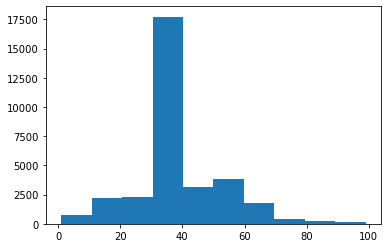

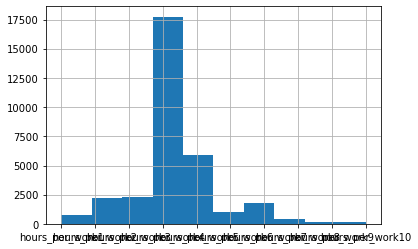

[1.0, 10.8, 20.6, 30.400000000000002, 40.2, 50.0, 59.800000000000004, 69.60000000000001, 79.4, 89.2, 99.0]


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,capital_loss,hours_per_work,native_country,salary,age_cat,hours_per_work_cat,fnlwgt_cat,education_num_cat,capital_gain_cat,capital_loss_cat
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,13,United-States,<=50K,2,1,3,3,0,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,40,United-States,<=50K,1,3,10,2,0,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,40,United-States,<=50K,2,3,11,1,0,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,40,Cuba,<=50K,0,3,16,3,0,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,0,40,United-States,<=50K,1,3,13,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,...,0,38,United-States,<=50K,0,3,12,3,0,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,0,40,United-States,>50K,1,3,7,2,0,0
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,...,0,40,United-States,<=50K,2,3,7,2,0,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,...,0,20,United-States,<=50K,0,1,9,2,0,0


In [183]:
cont_to_cat2("hours_per_work",10)
adult_WthNull_Disc['hours_per_work_cat'] = adult_WthNull_Disc.hours_per_work_cat.cat.codes
adult_WthNull_Disc

In [184]:
# SLOW TO RUN!! Average time: 15 minutes
# create a set of randomized index
np.random.seed(seed = 2021)
rand_index = np.arange(adult_WthNull_Disc.shape[0])
np.random.shuffle(rand_index)
adult_WthNull_Disc_rand = adult_WthNull_Disc.iloc[rand_index]

# split the randomized data into 10 folds
num_folds = 10
folds = np.array_split(adult_WthNull_Disc_rand, num_folds)
true_labels_c4 = []
pred_labels_c4 = []
for i in range(num_folds):
    train_index = np.arange(num_folds).tolist()
    del train_index[i]
    train_data = pd.concat([folds[j] for j in train_index], axis = 0)
    test_data = folds[i]
    test_data.reset_index(drop = True, inplace = True)

    # predict the test data
    pred_labels_c4.append(GaussianNB_disc(train_data,test_data))
    true_labels_c4.append(test_data.salary)

In [185]:
folds_scores_c4 = [get_score(true_labels_c4[i], pred_labels_c4[i]) for i in range(len(true_labels_c4))]

score_table_c4 = {}
score_table_c4['subset'] = []
score_table_c4['accuracy'] = []
score_table_c4['recall'] = []
score_table_c4['precision'] = []
score_table_c4['f1_score'] = []

for i in range(10):
    fold_score_c4 = get_score(true_labels_c4[i], pred_labels_c4[i])
    score_table_c4['subset'].append('fold'+str(i+1))
    score_table_c4['accuracy'].append(fold_score_c4[0])
    score_table_c4['recall'].append(fold_score_c4[1])
    score_table_c4['precision'].append(fold_score_c4[2])
    score_table_c4['f1_score'].append(fold_score_c4[3])

full_score_c4 = get_score(np.hstack(true_labels_c4), np.hstack(pred_labels_c4))
score_table_c4['subset'].append("full_data")
score_table_c4['accuracy'].append(full_score_c4[0])
score_table_c4['recall'].append(full_score_c4[1])
score_table_c4['precision'].append(full_score_c4[2])
score_table_c4['f1_score'].append(full_score_c4[3])

pd.DataFrame(score_table_c4)

,subset,accuracy,recall,precision,f1_score
0,fold1,0.824017,0.780206,0.601586,0.679351
1,fold2,0.830467,0.800546,0.590726,0.679814
2,fold3,0.827703,0.767442,0.609231,0.679245
3,fold4,0.825860,0.756987,0.629293,0.687259
4,fold5,0.821560,0.774843,0.605108,0.679537
5,fold6,0.822174,0.764706,0.617211,0.683087
6,fold7,0.825553,0.767970,0.613293,0.681971
7,fold8,0.833538,0.757576,0.631579,0.688863
8,fold9,0.828624,0.785623,0.610169,0.686869
9,fold10,0.823403,0.752306,0.596033,0.665114


## Test Data

In [186]:
adult_test = pd.read_csv("adult_test.csv", na_values = 'NaN',skipinitialspace = True)
adult_test

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_work,native_country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16277,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [187]:
# Find the most frequent data in each column like in combination 4
adult_test["workclass"].fillna("Private",inplace= True)
adult_test["occupation"].fillna("Other-service",inplace=True)
adult_test["native_country"].fillna("United-States",inplace=True)

In [188]:
def cont_to_cat_Test(varname, m):    # updated con_to_cat function that used for test data
    n = math.ceil((adult_test[varname].max()-adult_test[varname].min())/m)    #  get range for each variable
    hist_obj = plt.hist(adult_test[varname], bins = n)   
    plt.show()
    bins_boundary = list(hist_obj[1]) # list of range for each bin
    group_labels =  [varname+str(x+1) for x in range(len(bins_boundary)-1)]  # sort groups
    adult_test[varname+'_cat'] = pd.cut(adult_test[varname],bins_boundary,labels = group_labels, include_lowest = True) 
    adult_test[varname+'_cat'].sort_values().hist()
    plt.show()
    print(bins_boundary)

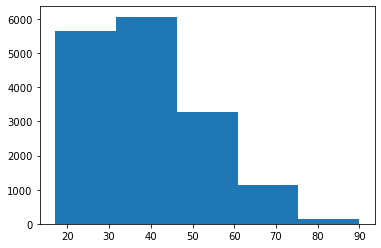

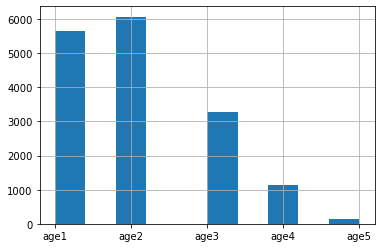

[17.0, 31.6, 46.2, 60.8, 75.4, 90.0]


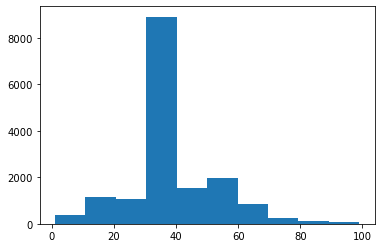

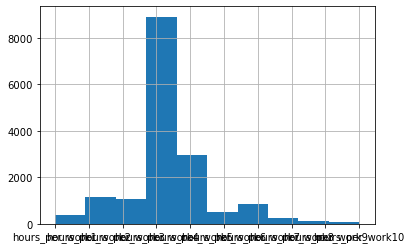

[1.0, 10.8, 20.6, 30.400000000000002, 40.2, 50.0, 59.800000000000004, 69.60000000000001, 79.4, 89.2, 99.0]


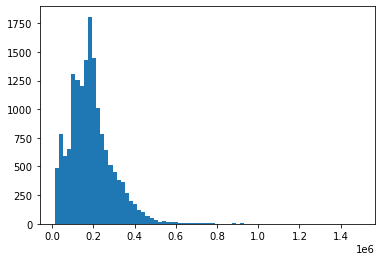

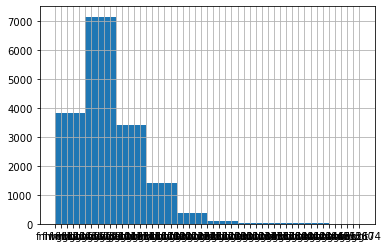

[13492.0, 33450.21621621621, 53408.43243243243, 73366.64864864865, 93324.86486486487, 113283.08108108108, 133241.2972972973, 153199.51351351352, 173157.72972972973, 193115.94594594595, 213074.16216216216, 233032.37837837837, 252990.59459459462, 272948.8108108108, 292907.02702702704, 312865.24324324325, 332823.45945945947, 352781.6756756757, 372739.8918918919, 392698.1081081081, 412656.3243243243, 432614.54054054053, 452572.75675675675, 472530.97297297296, 492489.18918918923, 512447.40540540544, 532405.6216216217, 552363.8378378379, 572322.0540540541, 592280.2702702703, 612238.4864864865, 632196.7027027027, 652154.9189189189, 672113.1351351351, 692071.3513513514, 712029.5675675676, 731987.7837837838, 751946.0, 771904.2162162162, 791862.4324324324, 811820.6486486486, 831778.8648648649, 851737.0810810811, 871695.2972972973, 891653.5135135135, 911611.7297297297, 931569.9459459459, 951528.1621621621, 971486.3783783785, 991444.5945945947, 1011402.8108108109, 1031361.0270270271, 1051319.24324

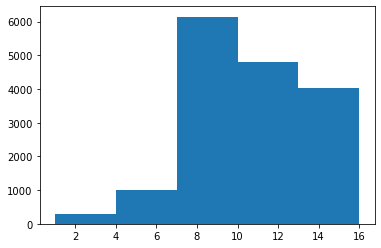

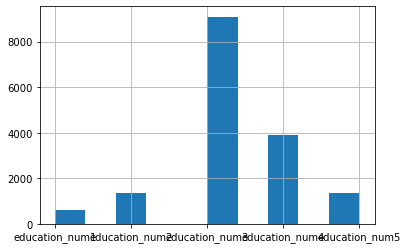

[1.0, 4.0, 7.0, 10.0, 13.0, 16.0]


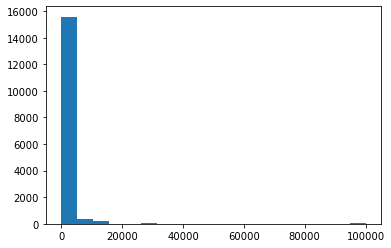

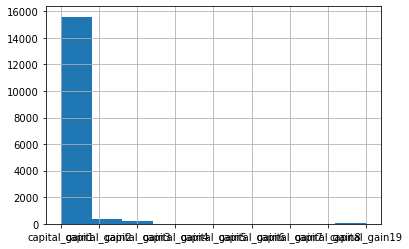

[0.0, 5263.105263157895, 10526.21052631579, 15789.315789473685, 21052.42105263158, 26315.526315789473, 31578.63157894737, 36841.73684210527, 42104.84210526316, 47367.94736842105, 52631.05263157895, 57894.15789473685, 63157.26315789474, 68420.36842105264, 73683.47368421053, 78946.57894736843, 84209.68421052632, 89472.78947368421, 94735.8947368421, 99999.0]


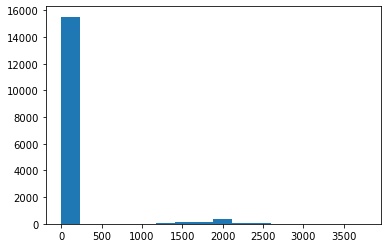

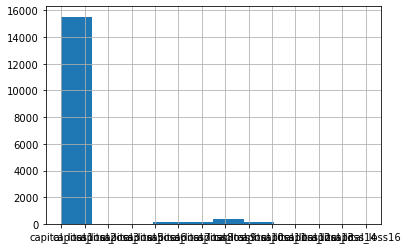

[0.0, 235.625, 471.25, 706.875, 942.5, 1178.125, 1413.75, 1649.375, 1885.0, 2120.625, 2356.25, 2591.875, 2827.5, 3063.125, 3298.75, 3534.375, 3770.0]


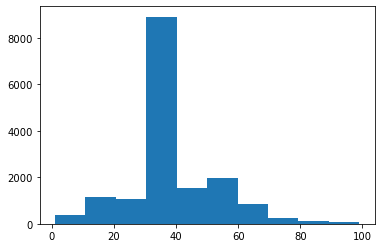

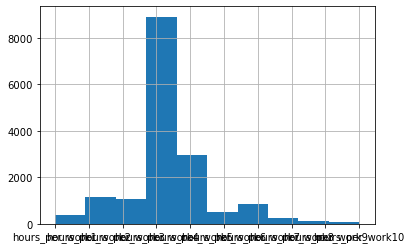

[1.0, 10.8, 20.6, 30.400000000000002, 40.2, 50.0, 59.800000000000004, 69.60000000000001, 79.4, 89.2, 99.0]


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,capital_loss,hours_per_work,native_country,salary,age_cat,hours_per_work_cat,fnlwgt_cat,education_num_cat,capital_gain_cat,capital_loss_cat
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,0,40,United-States,<=50K,0,3,10,1,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,0,50,United-States,<=50K,1,4,3,2,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,0,40,United-States,>50K,0,3,16,3,0,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,0,40,United-States,>50K,1,3,7,2,1,0
4,18,Private,103497,Some-college,10,Never-married,Other-service,Own-child,White,Female,...,0,30,United-States,<=50K,0,2,4,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,...,0,36,United-States,<=50K,1,3,10,3,0,0
16277,64,Private,321403,HS-grad,9,Widowed,Other-service,Other-relative,Black,Male,...,0,40,United-States,<=50K,3,3,15,2,0,0
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,...,0,50,United-States,<=50K,1,4,18,3,0,0
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,...,0,40,United-States,<=50K,1,3,3,3,1,0


In [189]:
cont_to_cat_Test("age",15)   
adult_test['age_cat'] = adult_test.age_cat.cat.codes
adult_test

cont_to_cat_Test("hours_per_work",10)
adult_test['hours_per_work_cat'] = adult_test.hours_per_work_cat.cat.codes
adult_test

cont_to_cat_Test("fnlwgt",20000)
adult_test['fnlwgt_cat'] = adult_test.fnlwgt_cat.cat.codes
adult_test

cont_to_cat_Test("education_num",3)
adult_test['education_num_cat'] = adult_test.education_num_cat.cat.codes
adult_test

cont_to_cat_Test("capital_gain",5500)
adult_test['capital_gain_cat'] = adult_test.capital_gain_cat.cat.codes
adult_test

cont_to_cat_Test("capital_loss",250)
adult_test['capital_loss_cat'] = adult_test.capital_loss_cat.cat.codes
adult_test

cont_to_cat_Test("hours_per_work",10)
adult_test['hours_per_work_cat'] = adult_test.hours_per_work_cat.cat.codes
adult_test

In [190]:
def GaussianNB_disc(train_data,test_data):
    salary_prob = count_occurence("salary",train_data)
    salary_prob.index = ["<=50K",">50K"]
    abov_50k = p_var_given_salary("age_cat",">50K",train_data,test_data)*\
               p_var_given_salary("workclass",">50K",train_data,test_data)*\
               p_var_given_salary("fnlwgt_cat",">50K",train_data,test_data) *\
               p_var_given_salary("education",">50K",train_data,test_data)*\
               p_var_given_salary("education_num_cat",">50K",train_data,test_data) *\
               p_var_given_salary("marital_status",">50K",train_data,test_data)*\
               p_var_given_salary("occupation",">50K",train_data,test_data)*\
               p_var_given_salary("relationship",">50K",train_data,test_data)*\
               p_var_given_salary("race",">50K",train_data,test_data)*\
               p_var_given_salary("sex",">50K",train_data,test_data) *\
               p_var_given_salary("capital_gain_cat",">50K",train_data,test_data) *\
               p_var_given_salary("capital_loss_cat",">50K",train_data,test_data)*\
               p_var_given_salary("hours_per_work_cat",">50K",train_data,test_data)*\
               p_var_given_salary("native_country",">50K",train_data,test_data)*\
               salary_prob.loc[">50K","salary_prob"] 
    below_50k = p_var_given_salary("age_cat","<=50K",train_data,test_data)*\
                p_var_given_salary("workclass","<=50K",train_data,test_data)*\
                p_var_given_salary("fnlwgt_cat","<=50K",train_data,test_data) *\
                p_var_given_salary("education","<=50K",train_data,test_data)*\
                p_var_given_salary("education_num_cat","<=50K",train_data,test_data) *\
                p_var_given_salary("marital_status","<=50K",train_data,test_data)*\
                p_var_given_salary("occupation","<=50K",train_data,test_data)*\
                p_var_given_salary("relationship","<=50K",train_data,test_data)*\
                p_var_given_salary("race","<=50K",train_data,test_data)*\
                p_var_given_salary("sex","<=50K",train_data,test_data)*\
                p_var_given_salary("capital_gain_cat","<=50K",train_data,test_data)*\
                p_var_given_salary("capital_loss_cat","<=50K",train_data,test_data)*\
                p_var_given_salary("hours_per_work_cat","<=50K",train_data,test_data)*\
                p_var_given_salary("native_country","<=50K",train_data,test_data)*\
                salary_prob.loc["<=50K","salary_prob"] 
    return np.where(abov_50k > below_50k, ">50K", "<=50K")

In [ ]:
# SLOW TO RUN!! Average time: 15 minutes
# split the randomized data into 10 folds
true_labels_test = []
pred_labels_test = []
train_data = adult_WthNull_Disc
test_data = adult_test
test_data.reset_index(drop = True, inplace = True)

# predict the test data
pred_labels_for_train = GaussianNB_disc(train_data,train_data)
pred_labels_test = GaussianNB_disc(train_data,test_data)
true_labels_test = test_data.salary

In [ ]:
train_scores__for_train_data = get_score(train_data.salary, pred_labels_for_train)
train_scores__for_test_data = get_score(test_data.salary, pred_labels_test)

score_table_test = {}
score_table_test['subset'] = []
score_table_test['accuracy'] = []
score_table_test['recall'] = []
score_table_test['precision'] = []
score_table_test['f1_score'] = []

score_table_test['subset'].append('Predict on train data')
score_table_test['accuracy'].append(train_scores__for_train_data[0])
score_table_test['recall'].append(train_scores__for_train_data[1])
score_table_test['precision'].append(train_scores__for_train_data[2])
score_table_test['f1_score'].append(train_scores__for_train_data[3])

score_table_test['subset'].append('Predict on test data')
score_table_test['accuracy'].append(train_scores__for_test_data[0])
score_table_test['recall'].append(train_scores__for_test_data[1])
score_table_test['precision'].append(train_scores__for_test_data[2])
score_table_test['f1_score'].append(train_scores__for_test_data[3])

pd.DataFrame(score_table_test)